In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../relative_fitness_mechanisms/')
import plot_utils

In [47]:
# Show that we can recover 

def find_sufficient_k(singular_values, threshold):
    energies = np.square(singular_values) / np.sum(np.square(singular_values))
    energies_cum = np.cumsum(energies)
    if (energies_cum > threshold).any():
        return np.argmax(energies_cum > threshold)
    else:
        return None

    

In [48]:
singular_values = np.array([0.4, 0.19, 0.01])
(singular_values ** 2) / (singular_values ** 2).sum()

array([8.15494393e-01, 1.83995923e-01, 5.09683996e-04])

In [49]:
find_sufficient_k(singular_values, 0.9)

1

In [ ]:
# Now we find sufficient k for mant realizations

In [168]:
max_time = 30 * 6
times = np.arange(max_time)

def simulate_delta(num_latent, num_variants):
    # Generate escape
    eta = np.random.normal(size=(num_latent, num_variants))

    # Generate immune pools
    means = np.random.uniform(size=num_latent) * max_time
    scales = np.random.uniform(size=num_latent)* 50 + 15
    phi = np.exp(-np.square((times[:,None] - means) / scales))
    phi = phi / phi.sum(axis=1)[:,None]

    # Compute delta
    delta_true = phi @ eta 
    delta = delta_true + np.random.normal(size=(max_time, num_variants)) * 0.01
    return delta

def find_svd_size(data, threshold):
    _, S, _ = np.linalg.svd(data, full_matrices=False)
    return find_sufficient_k(S, threshold)

In [181]:
# Loop over the num_latent
num_samples = 5
num_latent_arr = np.arange(2, 50, 1)

num_latent_est_arr = np.empty((num_latent_arr.shape[0], num_samples))
for l, num_latent in enumerate(num_latent_arr):
    for s in range(num_samples):
        delta = simulate_delta(num_latent, 500)
            # Fit SVD and pull out major component
        num_latent_est = find_svd_size(delta, 0.99)
        if num_latent_est is not None:
            num_latent_est_arr[l, s] = num_latent_est    

Text(0, 0.5, 'Estimated latent factors')

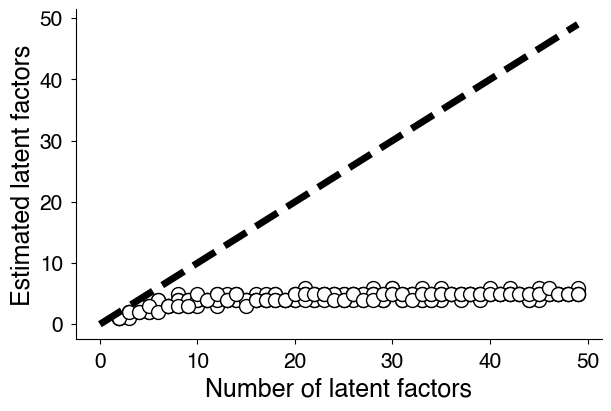

In [182]:
fig = plt.figure(figsize=(6., 4.), constrained_layout=True)
spec = fig.add_gridspec(ncols=1, nrows=1)
ax = fig.add_subplot(spec[0])
ax.scatter([num_latent_arr] * num_samples, num_latent_est_arr.T, ec="k", color="w", s=100)
ax.plot([0, num_latent_arr[-1]], [0, num_latent_arr[-1]], linestyle="--", color="k")
ax.set_xlabel("Number of latent factors")
ax.set_ylabel("Estimated latent factors")